In [1]:
%matplotlib inline
import isce
import os
import glob
import numpy as np
import shutil
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show # plotting raster data
from rasterio.plot import show_hist #histograms of raster data
from uavsar_pytools.georeference import geolocate_uavsar

2023-11-16 09:03:44,808 - rasterio.session - DEBUG - Could not import boto3, continuing with reduced functionality.


/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# get home dir
home = '/Users/jtarrico/'
os.chdir(home)
os.getcwd()

'/Users/jtarrico'

In [6]:
# working folder name
isce_directory = 'sierra_isce_multi'
    
# path to folder
working_dir = os.path.join(home,isce_directory)

In [9]:
# make new folder
os.mkdir(working_dir)
print("Directory '%s' created" %isce_directory)

Directory 'sierra_isce_multi' created


In [10]:
# nativate to new folder
# os.chdir(working_dir)
os.getcwd()

'/Users/jtarrico/sierra_isce_multi'

In [11]:
## create subdirectories

# download
dl = 'download'
download_path = os.path.join(working_dir,dl)
# os.mkdir(download_path)

# slc
SLC = 'SLC'
slc_path = os.path.join(working_dir,SLC)
# os.mkdir(slc_path)

# baselines
bl = 'baselines'
baselines_path = os.path.join(working_dir,bl)
# os.mkdir(baselines_path)

# referenceShelve
rs = 'referenceShelve'
referenceShelve_path = os.path.join(working_dir,rs)
# os.mkdir(referenceShelve_path)

# dem
dem = 'DEM'
dem_path = os.path.join(working_dir,dem)
# os.mkdir(dem_path)

# igrams
igrams = 'igrams'
igrams_path = os.path.join(working_dir,igrams)
# os.mkdir(igrams_path)

In [12]:
# check folders were created
for file in os.listdir(working_dir):
    d = os.path.join(working_dir, file)
    if os.path.isdir(d):
        print(d)

/Users/jtarrico/sierra_isce_multi/SLC
/Users/jtarrico/sierra_isce_multi/referenceShelve
/Users/jtarrico/sierra_isce_multi/igrams
/Users/jtarrico/sierra_isce_multi/download
/Users/jtarrico/sierra_isce_multi/DEM
/Users/jtarrico/sierra_isce_multi/baselines


# nativate to download folder
os.chdir(download_path)
os.getcwd()

## download

In [14]:
# create .sh file from links

links = ['wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC.dop',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s1_1x1.llh',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s1_1x1.lkv',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s2_1x1.llh',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s2_1x1.lkv',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC_s2_1x1.slc']

with open('downloads.sh', 'w') as f:
    for links in links:
        f.write(links)
        f.write('\n')

In [21]:
# list files downloaded
for i in os.listdir(download_path):
    file = os.path.join(download_path, i)
    print(file)

/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20002_001_200131_L090VV_01_BC_s2_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20009_023_200219_L090VV_01_BC.ann
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20014_000_200226_L090VV_01_BC_s1_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/.DS_Store
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_01_BC.dop
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20016_005_200311_L090VV_01_BC_s2_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_01_BC_s1_2x8.llh
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20006_002_200212_L090VV_01_BC.ann
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sie

## merge segments

add these scripts to the stripmapp folder

```pair.py``` \
```group_segments_dayhrmin_4isce.py``` \
```make_ifg_vrt_xml_isce.py``` \
```insar.py``` \
```make_slc_vrt_xml_isce.py``` \
```cat_and_interfere_py3.py``` \
```unpackFrame_UAVSAR_JPLcode.py``` 

In [40]:
# start in downloads directory
os.chdir('./download/')

In [26]:
# read segments
# ! group_segments_dayhrmin_4isce.py . > images.json

In [ ]:
# generate ancillary files
# ! make_slc_vrt_xml_isce.py ./

In [ ]:
# form insar pairs at 8x2
# ! cat_and_interfere_py3.py -d int -r 2 -a 8 images.json pairs.txt

In [ ]:
# gen more anc files
# ! make_ifg_vrt_xml_isce.py -i int/

## test plot

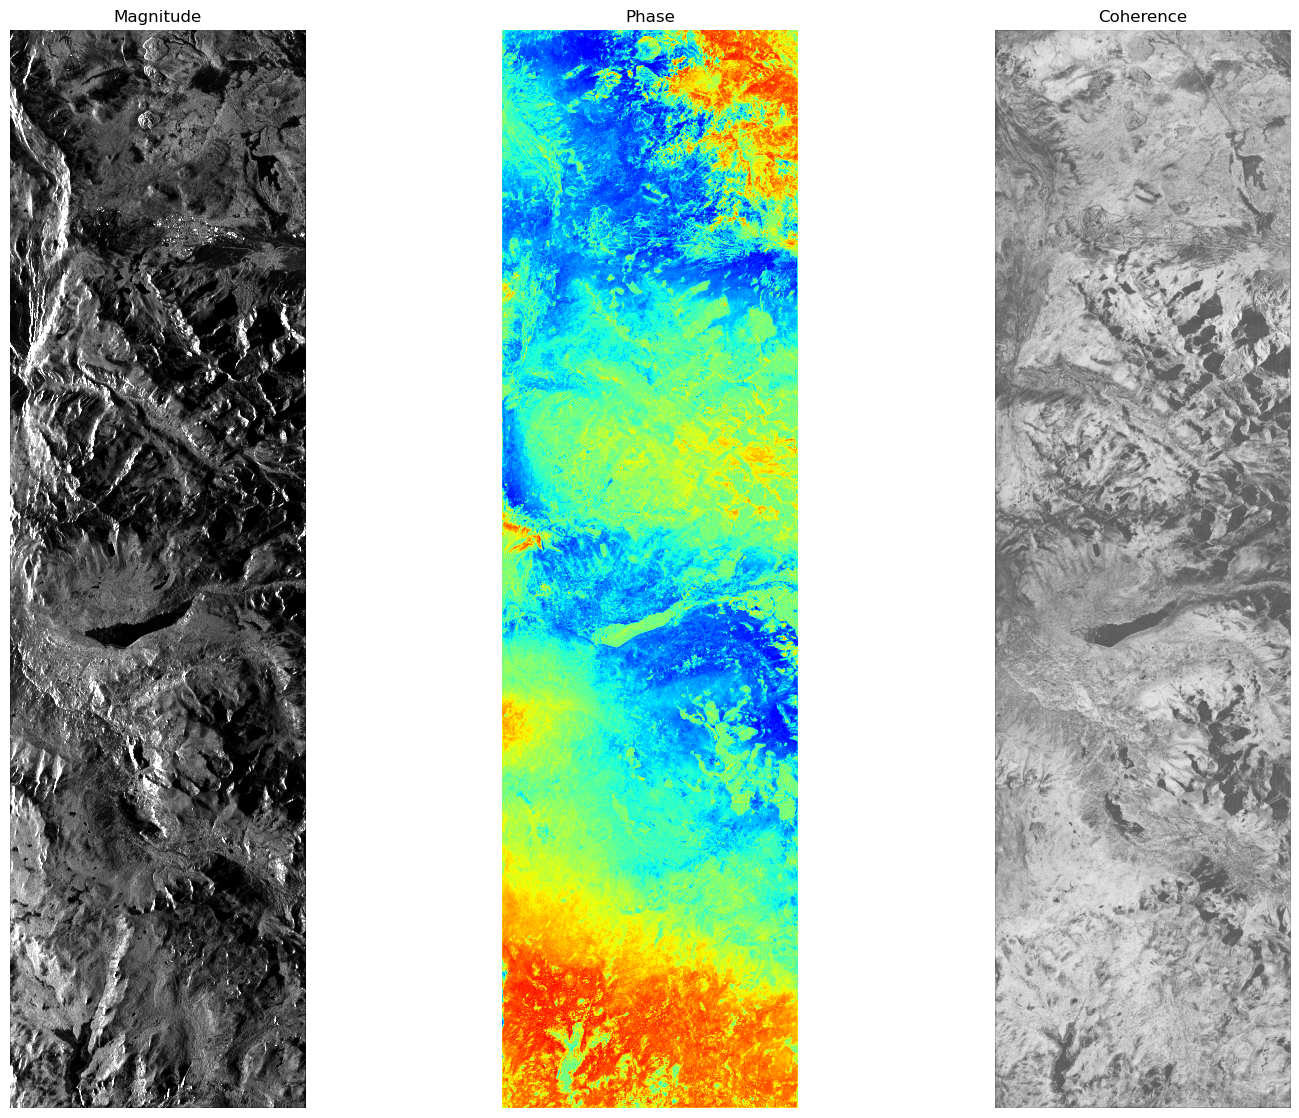

In [37]:
w_int = './int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.vrt'
coh_path = './int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.cor.vrt'

# read int
ds = gdal.Open(w_int, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# read
coh_ds = gdal.Open(coh_path, gdal.GA_ReadOnly)
coh = coh_ds.GetRasterBand(1).ReadAsArray()
coh_ds = None

fig = plt.figure(figsize=(18, 14))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(igram), vmin = 0, vmax = .3, cmap = 'gray')
ax.set_title("Magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(igram), cmap = 'jet', vmax = 3.14, vmin = -3.14)
ax.set_title("Phase")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
ax.imshow(coh, vmin = 0 , vmax = 1, cmap = 'gray')
ax.set_title("Coherence")
ax.set_axis_off()

# Phase Unwrapping

In [45]:
# start in downloads directory
os.chdir('/Users/jtarrico/sierra_isce_multi/')

In [49]:
# create text file of date list
! ls --color=never int/ >> datelist.txt

In [51]:
# print contents of that file
with open('datelist.txt') as f:
    lines = f.readlines()
    print(lines)

['20200131T1903_20200212T2211\n']


In [52]:
! unwrap.py -h

usage: unwrap.py [-h] -i INTFILE -u UNWPREFIX -c COHFILE [--nomcf]
                 [-a AZLOOKS] [-r RGLOOKS] [-d DEFOMAX] [-s REFERENCE]
                 [-m METHOD]

Unwrap interferogram using snaphu

optional arguments:
  -h, --help            show this help message and exit
  -i INTFILE, --ifg INTFILE
                        Input interferogram
  -u UNWPREFIX, --unwprefix UNWPREFIX
                        Output unwrapped file prefix
  -c COHFILE, --coh COHFILE
                        Coherence file
  --nomcf               Run full snaphu and not in MCF mode
  -a AZLOOKS, --alks AZLOOKS
                        Number of azimuth looks
  -r RGLOOKS, --rlks RGLOOKS
                        Number of range looks
  -d DEFOMAX, --defomax DEFOMAX
                        Max cycles of deformation
  -s REFERENCE, --reference REFERENCE
                        Reference directory
  -m METHOD, --method METHOD
                        unwrapping method


In [65]:
# run snaphu, this will take a while
! awk -F "_" '{print "unwrap.py -i int/"$1"_"$2"/"$1"_"$2".int -u int/"$1"_"$2"/"$1"_"$2".unw -c int/"$1"_"$2"/"$1"_"$2".coh -a 8 -r 2 -s download/"$1"/ -m snaphu"}' datelist.txt >> unwall.sh

In [ ]:
! sh unwall.sh

snaphu
int/20200131T1903_20200212T2211/referenceShelve/data
unwrapping method :  snaphu

snaphu v1.4.2
Reading wrapped phase from file int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int


In [ ]:
# list files generated in unwrapping process
!ls igrams/*/*

In [ ]:
# plot

# reading the multi-looked wrapped interferogram
ds = gdal.Open("igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw, vmin = -2, vmax = 7, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-2,0,7], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components, cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0,21] , orientation='horizontal')
cbar.ax.set_xticklabels([0,21])


connected_components = None

In [ ]:
!gdalinfo igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw.vrt

In [ ]:
# path to your unw.vrt
in_fp = 'igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw.vrt'

# path to annotation file
ann_fp = '/Users/jtarrico/sierra_isce/SLC/20200226T2253/sierra_17305_20014_000_200226_L090VV_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jtarrico/sierra_isce/geocode_test'

# path to lat/lon/height file
llh_fp = '/Users/jtarrico/sierra_isce/download/sierra_17305_01_BC_s1_2x8.llh'

In [ ]:
# run geolocate function
# geolocated_data = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
# print(geolocated_data[0])

In [ ]:
# path to your unw.vrt
in_fp = 'igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.coh.vrt'

# path to annotation file
ann_fp = '/Users/jtarrico/sierra_isce/SLC/20200226T2253/sierra_17305_20014_000_200226_L090VV_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jtarrico/sierra_isce/geocode_test'

# path to lat/lon/height file
llh_fp = '/Users/jtarrico/sierra_isce/download/sierra_17305_01_BC_s1_2x8.llh'

# coh_geo = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
# print(coh_geo[0])

In [ ]:
# path to your unw.vrt
in_fp = 'igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw.conncomp.vrt'

# path to annotation file
ann_fp = '/Users/jtarrico/sierra_isce/SLC/20200226T2253/sierra_17305_20014_000_200226_L090VV_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jtarrico/sierra_isce/geocode_test'

# path to lat/lon/height file
llh_fp = '/Users/jtarrico/sierra_isce/download/sierra_17305_01_BC_s1_2x8.llh'

concomp_geo = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(concomp_geo[0])

In [ ]:
# Plot geolocated unwrapped phase data!
with rio.open(geolocated_data[0]) as src:
    plt.subplots(1, figsize=(15, 15))
    show(src, vmin = -3, vmax = 3) 